In [68]:
import sys
import os

#Ensure Python can find the Code directory
sys.path.append(os.path.abspath(".."))

import utils

In [69]:
#Use functions and packages
df = utils.load_data()
df.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [70]:
#Drop duplicate rows based on the 'name' column
df_non_dup = df.drop_duplicates(subset='name')
#Drop rows where is_resid is -1 (cases where the researcher was not able to confirm whether the individual reoffended)
df_non_dup = df_non_dup[df_non_dup['is_recid'] != -1]
df_non_dup = df_non_dup[df_non_dup['decile_score'] != -1]

In [71]:
df_non_dup.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
9,10.0,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,...,NaN,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,1,0
10,11.0,bouthy pierrelouis,bouthy,pierrelouis,Male,22/01/1973,43,25 - 45,Other,0,...,NaN,Risk of Recidivism,1,Low,26/03/2013,Risk of Violence,1,Low,2,0


### Identify optimal number of bins for histogram

In [72]:
#Use Rice Rule to determine number of bins
rice_bins = utils.np.ceil(2 *utils.np.cbrt(len(df_non_dup)))

In [73]:
#Use Freedman-Diaconis Rule to determine number of bins
bin_width = 2*((utils.np.percentile(df_non_dup['age'], 75) - utils.np.percentile(df_non_dup['age'], 25))/ utils.np.cbrt(len(df_non_dup)))
fd_bins = int(utils.np.ceil((max(df_non_dup['age']) - min(df_non_dup['age']))/bin_width))

In [74]:
#Use Sturges' Rule to determine an appropriate number of bins
sturges_bin = utils.np.ceil(utils.np.log2(len(df_non_dup['age'])) + 1)

In [75]:
int(df_non_dup['age'].min())


18

In [76]:
#Manually set bin sizes
age_min = int(df_non_dup['age'].min())
age_max = int(df_non_dup['age'].max())

bins = bins_3_year = list(range(age_min, age_max + 4, 3))


In [77]:
len(bins_3_year)

28

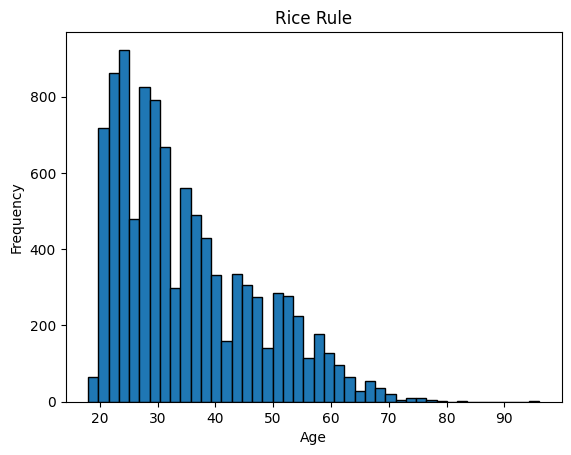

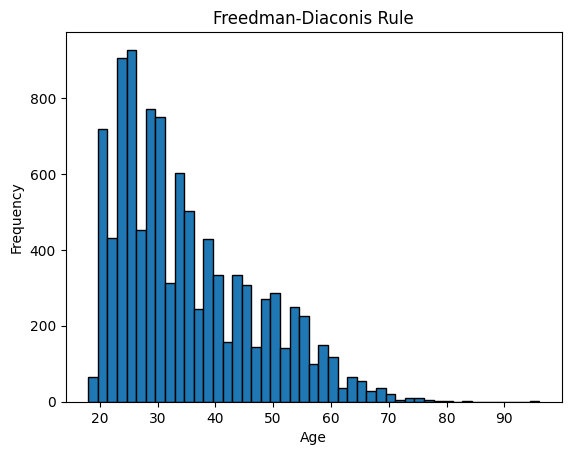

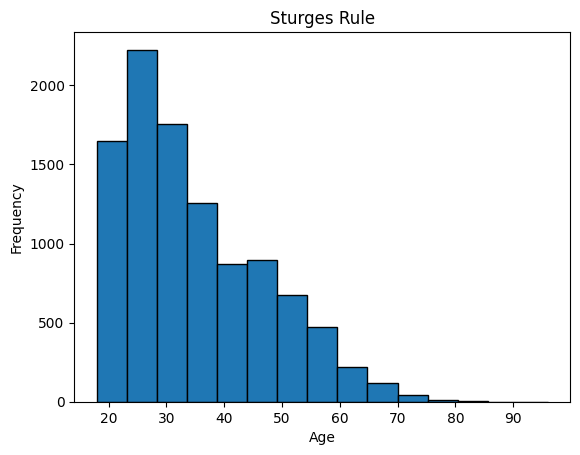

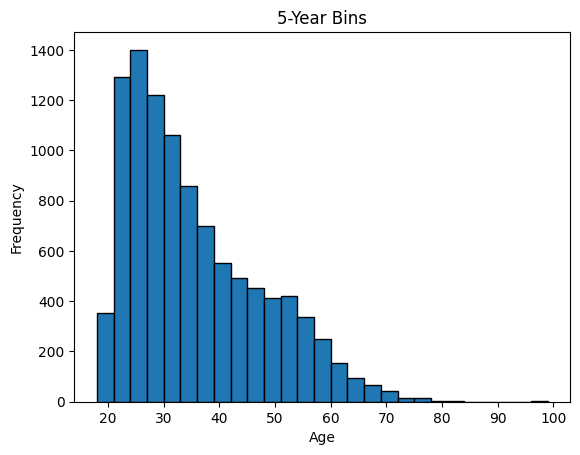

In [78]:
#Create a list of titles
titles = ['Rice Rule', 'Freedman-Diaconis Rule', 'Sturges Rule', '5-Year Bins']
#Plot the histograms for the different bin sizes
for i, bins in enumerate([int(rice_bins), int(fd_bins), int(sturges_bin), bins_3_year]):
    utils.plt.hist(df_non_dup['age'], bins=bins, edgecolor='black')
    utils.plt.title(titles[i])
    utils.plt.xlabel('Age')
    utils.plt.ylabel('Frequency')
    utils.plt.show()

## Age Distribution

<Axes: xlabel='age', ylabel='Count'>

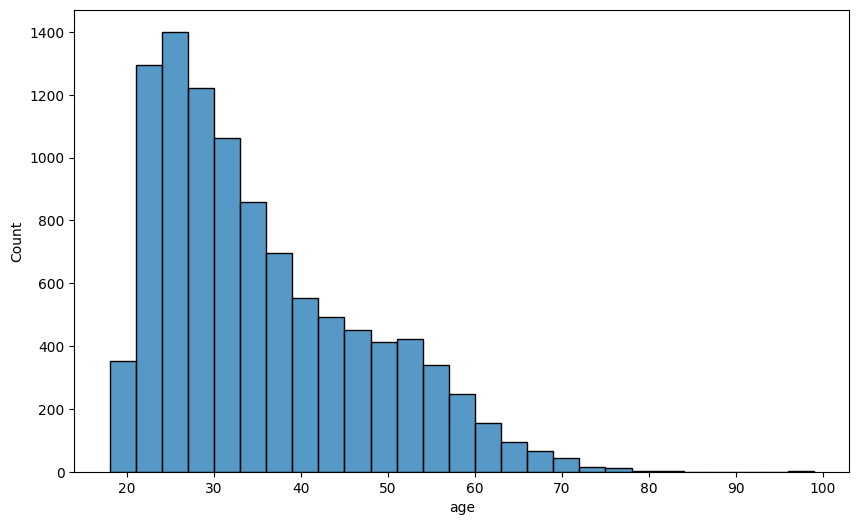

In [79]:
#Visualize the age distribution
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup['age'], bins = bins_3_year)

In [80]:
#Create a table that contains the count for each bin
age_bins = utils.pd.cut(df_non_dup['age'], bins = bins_3_year)
age_bins_table = age_bins.value_counts().reset_index()
age_bins_table['proportion'] = age_bins_table['count'] / age_bins_table['count'].sum()
age_bins_table.sort_values('age')

,age,count,proportion
5,"(18, 21]",779,0.076447
1,"(21, 24]",1336,0.131109
0,"(24, 27]",1378,0.135231
2,"(27, 30]",1165,0.114328
3,"(30, 33]",966,0.094799
4,"(33, 36]",805,0.078999
6,"(36, 39]",672,0.065947
8,"(39, 42]",491,0.048184
7,"(42, 45]",498,0.048871
10,"(45, 48]",418,0.041021


Text(0.5, 1.0, 'Risk of Recidivism by Age')

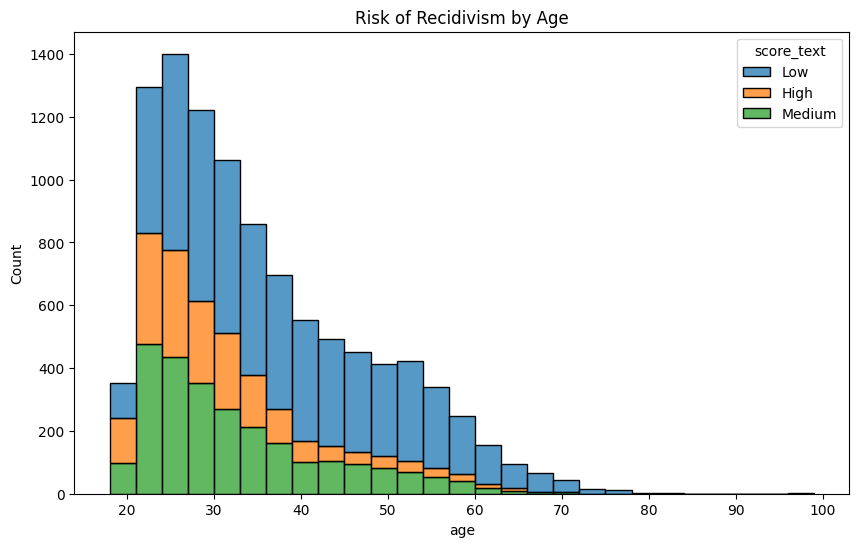

In [81]:
#Visualize the age distribution with 'score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='score_text', bins = bins_3_year, multiple='stack')
utils.plt.title('Risk of Recidivism by Age')

## Age Distribution by Risk of Recidivism

In [82]:
#Count the values of each 'score_text' for each 'age' bin
age_score_table = df_non_dup.groupby([age_bins, 'score_text'], observed=True)['name'].count().reset_index()
age_score_table.columns = ['age', 'score_text', 'count_score']
age_score_table['proportion'] = (age_score_table.groupby(['age'])['count_score'].apply((lambda x: x / x.sum()* 100)).values)
age_score_table

,age,score_text,count_score,proportion
0,"(18, 21]",High,276,35.430039
1,"(18, 21]",Low,244,31.322208
2,"(18, 21]",Medium,259,33.247754
3,"(21, 24]",High,322,24.101796
4,"(21, 24]",Low,540,40.419162
5,"(21, 24]",Medium,474,35.479042
6,"(24, 27]",High,331,24.020319
7,"(24, 27]",Low,634,46.008708
8,"(24, 27]",Medium,413,29.970972
9,"(27, 30]",High,263,22.575107


In [83]:

#For each bin and 'score_text' count the number of people who rescidivated and who did not
age_score_resid_table = df_non_dup.groupby([age_bins, 'score_text', 'is_recid'], observed=True)['name'].count().reset_index()
age_score_resid_table.columns = ['age', 'score_text', 'is_recid', 'count_score']
age_score_resid_table['proportion'] = (age_score_resid_table.groupby(['age', 'score_text'])['count_score'].apply((lambda x: x / x.sum()* 100)).values)
age_score_resid_table

,age,score_text,is_recid,count_score,proportion
0,"(18, 21]",High,0,113,40.942029
1,"(18, 21]",High,1,163,59.057971
2,"(18, 21]",Low,0,165,67.622951
3,"(18, 21]",Low,1,79,32.377049
4,"(18, 21]",Medium,0,139,53.667954
...,...,...,...,...,...
105,"(75, 78]",Low,0,7,87.500000
106,"(75, 78]",Low,1,1,12.500000
107,"(78, 81]",Low,0,2,100.000000
108,"(81, 84]",Low,0,2,100.000000


Text(0.5, 1.0, 'Risk of Violence by Age')

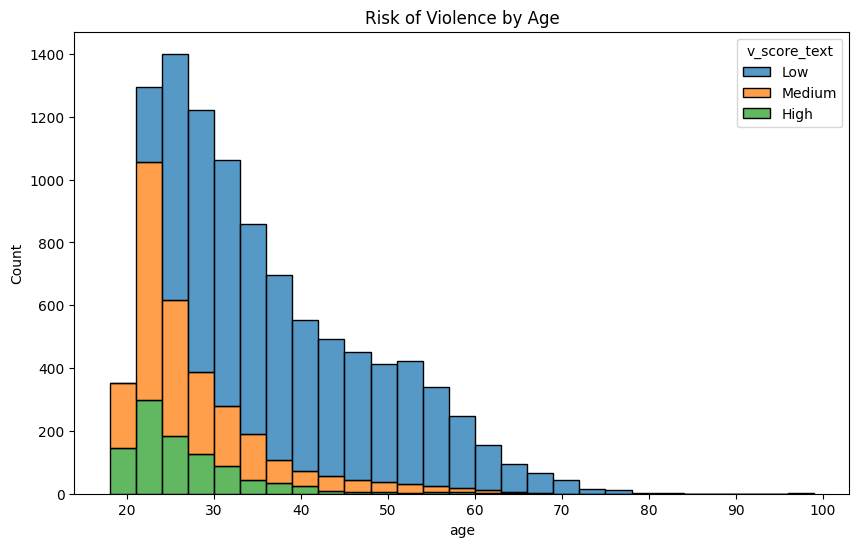

In [84]:
#Visualize the age distribution with 'v_score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='v_score_text', bins = bins_3_year, multiple='stack')
utils.plt.title('Risk of Violence by Age')

## Age Distribution by Violent Recidivism

In [85]:
#Count the values of each 'v_score_text' for each 'age' bin and display the proportion
age_v_score_table = df_non_dup.groupby([age_bins, 'v_score_text'], observed=True)['name'].count().reset_index()
age_v_score_table.columns = ['age', 'v_score_text', 'count_v_score']
age_v_score_table['proportion'] = (age_v_score_table.groupby(['age'])['count_v_score'].apply((lambda x: x / x.sum()* 100)).values)
age_v_score_table

,age,v_score_text,count_v_score,proportion
0,"(18, 21]",High,272,34.916560
1,"(18, 21]",Low,14,1.797176
2,"(18, 21]",Medium,493,63.286264
3,"(21, 24]",High,225,16.841317
4,"(21, 24]",Low,474,35.479042
5,"(21, 24]",Medium,637,47.679641
6,"(24, 27]",High,177,12.844702
7,"(24, 27]",Low,835,60.595065
8,"(24, 27]",Medium,366,26.560232
9,"(27, 30]",High,107,9.184549


In [86]:
#For each bin and 'v_score_text' count the number of people who rescidivated (violent) and who did not
age_vscore_resid_table = df_non_dup.groupby([age_bins, 'v_score_text', 'is_violent_recid'], observed=True)['name'].count().reset_index()
age_vscore_resid_table.columns = ['age', 'v_score_text', 'is_violent_recid', 'count_score']
age_vscore_resid_table['proportion'] = (age_vscore_resid_table.groupby(['age', 'v_score_text'])['count_score'].apply((lambda x: x / x.sum()* 100)).values)
age_vscore_resid_table

,age,v_score_text,is_violent_recid,count_score,proportion
0,"(18, 21]",High,0,226,83.088235
1,"(18, 21]",High,1,46,16.911765
2,"(18, 21]",Low,0,14,100.000000
3,"(18, 21]",Medium,0,445,90.263692
4,"(18, 21]",Medium,1,48,9.736308
...,...,...,...,...,...
91,"(72, 75]",Low,0,15,100.000000
92,"(75, 78]",Low,0,8,100.000000
93,"(78, 81]",Low,0,2,100.000000
94,"(81, 84]",Low,0,2,100.000000


## Age Distribution by Race

Text(0.5, 1.0, 'Race by Age')

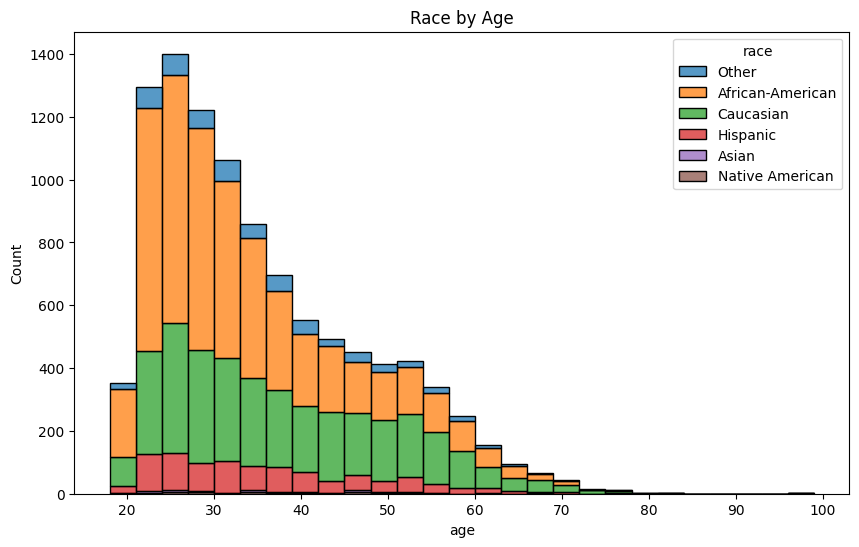

In [87]:
#Visualize the age distribution with 'race'
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='race', bins = bins_3_year, multiple='stack')
utils.plt.title('Race by Age')

In [88]:
#Count the values of each 'race' for each 'age' bin
age_race_table = df_non_dup.groupby([age_bins, 'race'], observed=True)['name'].count().reset_index()
age_race_table.columns = ['age', 'race', 'count']
age_race_table['proportion'] = (age_race_table.groupby(['age'])['count'].apply((lambda x: x / x.sum() *100)).values)
age_race_table

,age,race,count,proportion
0,"(18, 21]",African-American,470,60.333761
1,"(18, 21]",Asian,2,0.256739
2,"(18, 21]",Caucasian,202,25.930680
3,"(18, 21]",Hispanic,63,8.087291
4,"(18, 21]",Native American,2,0.256739
...,...,...,...,...
105,"(75, 78]",Caucasian,5,62.500000
106,"(78, 81]",Caucasian,2,100.000000
107,"(81, 84]",Caucasian,1,50.000000
108,"(81, 84]",Hispanic,1,50.000000


## Age Distribution by Race and Recidivism

In [89]:
#For each bin and 'race' count the number of people who rescidivated and who did not and the proportion of each bin
age_race_resid_table = df_non_dup.groupby([age_bins, 'race', 'is_recid'], observed=True)['name'].count().reset_index()
age_race_resid_table.columns = ['age', 'race', 'is_recid', 'count_score']
age_race_resid_table['proportion'] = (age_race_resid_table.groupby(['age', 'race'])['count_score'].apply((lambda x: x / x.sum() * 100)).values)
age_race_resid_table

,age,race,is_recid,count_score,proportion
0,"(18, 21]",African-American,0,244,51.914894
1,"(18, 21]",African-American,1,226,48.085106
2,"(18, 21]",Asian,1,2,100.000000
3,"(18, 21]",Caucasian,0,122,60.396040
4,"(18, 21]",Caucasian,1,80,39.603960
...,...,...,...,...,...
188,"(75, 78]",Caucasian,1,1,20.000000
189,"(78, 81]",Caucasian,0,2,100.000000
190,"(81, 84]",Caucasian,0,1,100.000000
191,"(81, 84]",Hispanic,0,1,100.000000


## Age Distribution by Race and Violent Recidivism

In [90]:
#For each bin and 'race' count the number of people who rescidivated (violent) and who did not and the proportion of each bin
age_race_vresid_table = df_non_dup.groupby([age_bins, 'race', 'is_violent_recid'], observed=True)['name'].count().reset_index()
age_race_vresid_table.columns = ['age', 'race', 'is_violent_recid', 'count_score']
age_race_vresid_table['proportion'] = (age_race_vresid_table.groupby(['age', 'race'])['count_score'].apply((lambda x: x / x.sum() * 100)).values)
age_race_vresid_table

,age,race,is_violent_recid,count_score,proportion
0,"(18, 21]",African-American,0,415,88.297872
1,"(18, 21]",African-American,1,55,11.702128
2,"(18, 21]",Asian,1,2,100.000000
3,"(18, 21]",Caucasian,0,178,88.118812
4,"(18, 21]",Caucasian,1,24,11.881188
...,...,...,...,...,...
165,"(75, 78]",Caucasian,0,5,100.000000
166,"(78, 81]",Caucasian,0,2,100.000000
167,"(81, 84]",Caucasian,0,1,100.000000
168,"(81, 84]",Hispanic,0,1,100.000000


# False Positive Rate by Age

The False Positive Rate is the proportion of individuals that were predicted to reoffend, but did not. This is calculated as the number of false positives divided by the number of individuals predicted to reoffend. For this analysis, we will be examining False Positives for individuals who were rated as 'High' risk of reoffending.

## False Positive Rate for Recidivism

In [91]:
#Filter the data to only include people with a 'High' risk score who did not recidivate
fp_resid = df_non_dup[(df_non_dup['is_recid'] == 0) & (df_non_dup['score_text'] == 'High')]
#Count the number of True Negative and False Positives 
tn_fp_count_resid = len(df_non_dup[(df_non_dup['is_recid'] == 0) & (df_non_dup['score_text'] == 'Low') | (df_non_dup['is_recid'] == 1) & (df_non_dup['score_text'] == 'Low')])
print(f"Count of True Negative and False Positives: {tn_fp_count_resid}")

Count of True Negative and False Positives: 5692


In [92]:
#Calculate the false positive rate for each 'age' bin
age_fp_table = fp_resid.groupby(age_bins)['name'].count().reset_index()
age_fp_table.columns = ['age', 'count']
age_fp_table['fp_rate'] = (age_fp_table['count'] / tn_fp_count_resid) * 100
age_fp_table

,age,count,fp_rate
0,"(18, 21]",113,1.985242
1,"(21, 24]",150,2.635278
2,"(24, 27]",138,2.424455
3,"(27, 30]",122,2.143359
4,"(30, 33]",86,1.510892
5,"(33, 36]",75,1.317639
6,"(36, 39]",48,0.843289
7,"(39, 42]",34,0.597330
8,"(42, 45]",25,0.439213
9,"(45, 48]",18,0.316233


## False Positive Rate for Violent Recidivism

In [93]:
#Filter the data to only include people with a 'High' risk score who did not recidivate (violent)
fp_v_resid = df_non_dup[(df_non_dup['is_violent_recid'] == 0) & (df_non_dup['v_score_text'] == 'High')]
#Count the number of True Negative and False Positives 
tn_fp_count_v_resid = len(df_non_dup[(df_non_dup['is_violent_recid'] == 0) & (df_non_dup['v_score_text'] == 'Low') | (df_non_dup['is_violent_recid'] == 1) & (df_non_dup['v_score_text'] == 'Low')])
print(f"Count of True Negative and False Positives: {tn_fp_count_v_resid}")

Count of True Negative and False Positives: 6899


In [94]:
#Calculate the false positive rate for each 'age' bin
age_fp_table_v = fp_v_resid.groupby(age_bins)['name'].count().reset_index()
age_fp_table_v.columns = ['age', 'count']
age_fp_table_v['fp_rate'] = (age_fp_table_v['count'] / tn_fp_count_v_resid) * 100
age_fp_table_v

,age,count,fp_rate
0,"(18, 21]",226,3.275837
1,"(21, 24]",179,2.594579
2,"(24, 27]",149,2.159733
3,"(27, 30]",91,1.319032
4,"(30, 33]",61,0.884186
5,"(33, 36]",28,0.405856
6,"(36, 39]",24,0.347877
7,"(39, 42]",18,0.260907
8,"(42, 45]",7,0.101464
9,"(45, 48]",4,0.057979


# False Negative Rate by Age

The False Negative Rate is the proportion of individuals that were predicted to not reoffend, but did. This is calculated as the number of false negatives divided by the number of individuals predicted to not reoffend. For this analysis, we will be examining False Negatives for individuals who were rated as 'Low' risk of reoffending.

## False Negative Rate for Recidivism

In [95]:
#Filter the data to only include people with a 'Low' risk score who recidivated
fn_resid = df_non_dup[(df_non_dup['is_recid'] == 1) & (df_non_dup['score_text'] == 'Low')]
#Count the number of True Positive and False Negatives
tp_fn_count_resid = len(df_non_dup[(df_non_dup['is_recid'] == 1) & (df_non_dup['score_text'] == 'High') | (df_non_dup['is_recid'] == 0) & (df_non_dup['score_text'] == 'High')])
print(f"Count of True Positive and False Negatives: {tp_fn_count_resid}")

Count of True Positive and False Negatives: 1919


In [96]:
#Calculate the false negative rate for each 'age' bin
age_fn_table = fn_resid.groupby(age_bins)['name'].count().reset_index()
age_fn_table.columns = ['age', 'count']
age_fn_table['fn_rate'] = (age_fn_table['count'] / tp_fn_count_resid) * 100
age_fn_table

,age,count,fn_rate
0,"(18, 21]",79,4.116727
1,"(21, 24]",163,8.494007
2,"(24, 27]",165,8.598228
3,"(27, 30]",169,8.806670
4,"(30, 33]",117,6.096925
5,"(33, 36]",103,5.367379
6,"(36, 39]",107,5.575821
7,"(39, 42]",51,2.657634
8,"(42, 45]",78,4.064617
9,"(45, 48]",53,2.761855


## False Negative Rate for Violent Recidivism

In [97]:
#Filter the data to only include people with a 'Low' risk score who recidivated (violent crime)
fn_v_resid = df_non_dup[(df_non_dup['is_violent_recid'] == 1) & (df_non_dup['v_score_text'] == 'Low')]
#Count the number of True Positive and False Negatives
tp_fn_count_v_resid = len(df_non_dup[(df_non_dup['is_violent_recid'] == 1) & (df_non_dup['v_score_text'] == 'High') | (df_non_dup['is_violent_recid'] == 0) & (df_non_dup['v_score_text'] == 'High')])
print(f"Count of True Positive and False Negatives: {tp_fn_count_v_resid}")

Count of True Positive and False Negatives: 980


In [98]:
#Calculate the false negative rate for each 'age' bin
age_fn_table_v = fn_v_resid.groupby(age_bins)['name'].count().reset_index()
age_fn_table_v.columns = ['age','count']
age_fn_table_v['fn_rate'] = (age_fn_table_v['count'] / tp_fn_count_v_resid) * 100
age_fn_table_v

,age,count,fn_rate
0,"(18, 21]",0,0.000000
1,"(21, 24]",25,2.551020
2,"(24, 27]",48,4.897959
3,"(27, 30]",56,5.714286
4,"(30, 33]",43,4.387755
5,"(33, 36]",47,4.795918
6,"(36, 39]",43,4.387755
7,"(39, 42]",17,1.734694
8,"(42, 45]",22,2.244898
9,"(45, 48]",11,1.122449
